In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = "C:\\Users\\Nayaz\\ml\\datasets\\songs_normalize.csv"

In [3]:
data = pd.read_csv(path)
data.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


In [4]:
data.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [5]:
data.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [6]:
data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

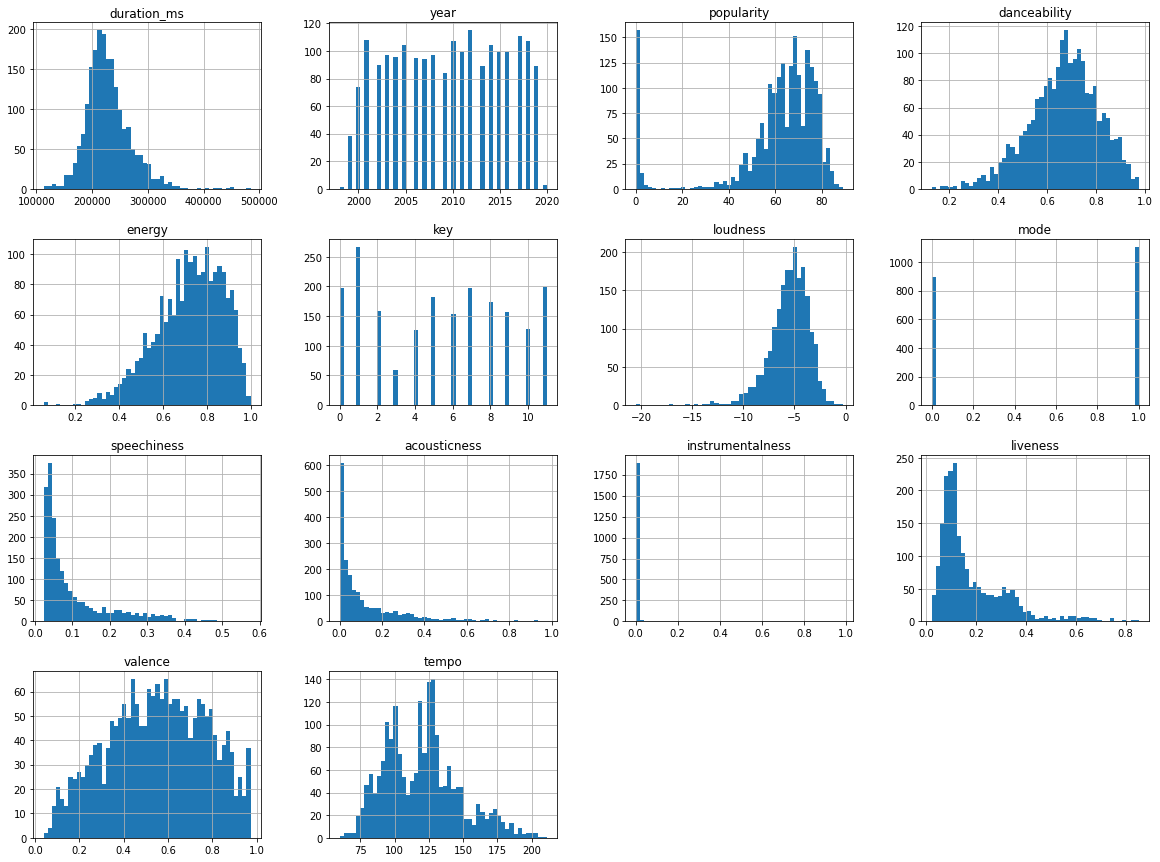

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

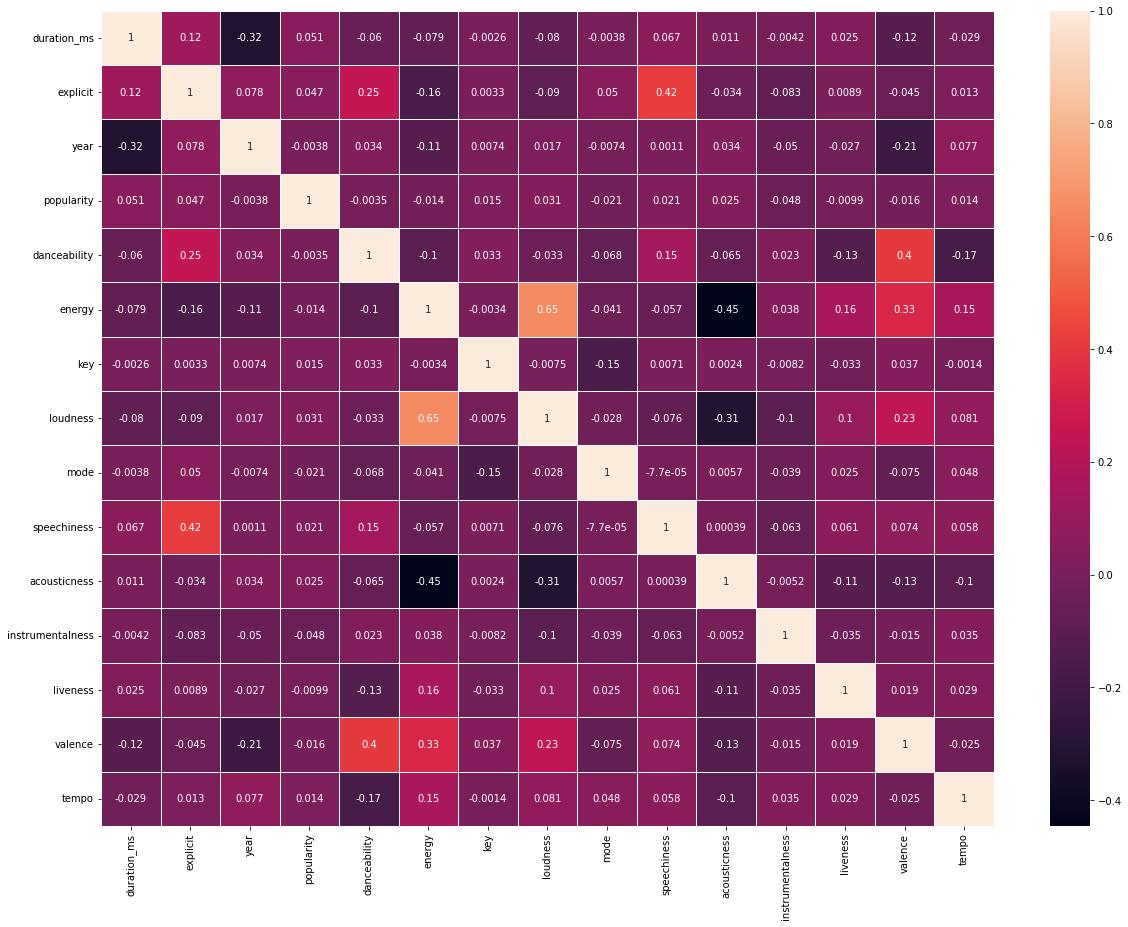

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, linewidths=1)

In [9]:
data['popularity'].value_counts()

0     126
69     76
68     75
73     69
74     69
     ... 
88      1
89      1
87      1
8       1
7       1
Name: popularity, Length: 76, dtype: int64

In [10]:
#scaling
data['popularity_scale'] = round((data['popularity'] - data['popularity'].min()) / (data['popularity'].max() - data['popularity'].min()) * 5)

In [11]:
data['popularity_scale'].value_counts()

4.0    1094
3.0     572
0.0     180
5.0      92
2.0      53
1.0       9
Name: popularity_scale, dtype: int64

In [12]:
#1-5 quantile discretization binarization
data['popularity_desc'] = pd.qcut(data['popularity'],q=2, labels=[0,1])

In [13]:
data['popularity_desc'].value_counts()

0    1000
1    1000
Name: popularity_desc, dtype: int64

In [14]:
#feature transformation
data['duration'] = data['duration_ms'] / 60000

In [15]:
data['explicit'].value_counts()

False    1449
True      551
Name: explicit, dtype: int64

In [16]:
#binarization
data.loc[data['explicit'] == False, 'explicit'] = 0
data.loc[data['explicit'] == True, 'explicit'] = 1

In [17]:
data['explicit'].value_counts()

0    1449
1     551
Name: explicit, dtype: int64

In [18]:
#feature transformation
data['age'] = 2023 - data['year']

In [19]:
data['age'].value_counts()

11    115
6     111
22    108
5     107
13    107
9     104
18    104
12     99
7      99
8      99
20     97
15     97
19     96
17     95
16     94
21     90
4      89
10     89
14     84
23     74
24     38
3       3
25      1
Name: age, dtype: int64

<AxesSubplot:>

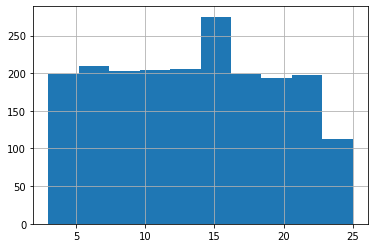

In [20]:
data['age'].hist()

In [21]:
data['age_desc'] = pd.qcut(data['age'], q=4, labels = [1,2,3,4])

In [22]:
data['age_desc'].value_counts()

3    570
2    514
1    508
4    408
Name: age_desc, dtype: int64

In [23]:
#categorical binarization

genre_df = pd.DataFrame(data['genre'])

for i in range(len(genre_df['genre'])):
    genre_df['genre'][i]= genre_df['genre'][i].split(', ')


for i in range(len(genre_df['genre'])):
    for j in genre_df['genre'][i]:
        if j not in genre_df.columns:
            genre_df[j] = 0
        genre_df[j][i] = 1
genre_df = genre_df.drop(columns = ['set()'])
genre_df

C:\Users\Nayaz\AppData\Local\Temp/ipykernel_25324/1368068356.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df[j][i] = 1


,genre,pop,rock,country,metal,hip hop,R&B,Dance/Electronic,Folk/Acoustic,easy listening,latin,blues,World/Traditional,jazz,classical
0,[pop],1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"[rock, pop]",1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,"[pop, country]",1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,"[rock, metal]",0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,[pop],1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,[pop],1,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,[pop],1,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,"[hip hop, country]",0,0,1,0,1,0,0,0,0,0,0,0,0,0
1998,[pop],1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
datanew = pd.concat([data, genre_df], axis=1, join='inner')

In [25]:
datanew.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,hip hop,R&B,Dance/Electronic,Folk/Acoustic,easy listening,latin,blues,World/Traditional,jazz,classical
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,0,0,0
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,...,0,0,0,0,0,0,0,0,0,0
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

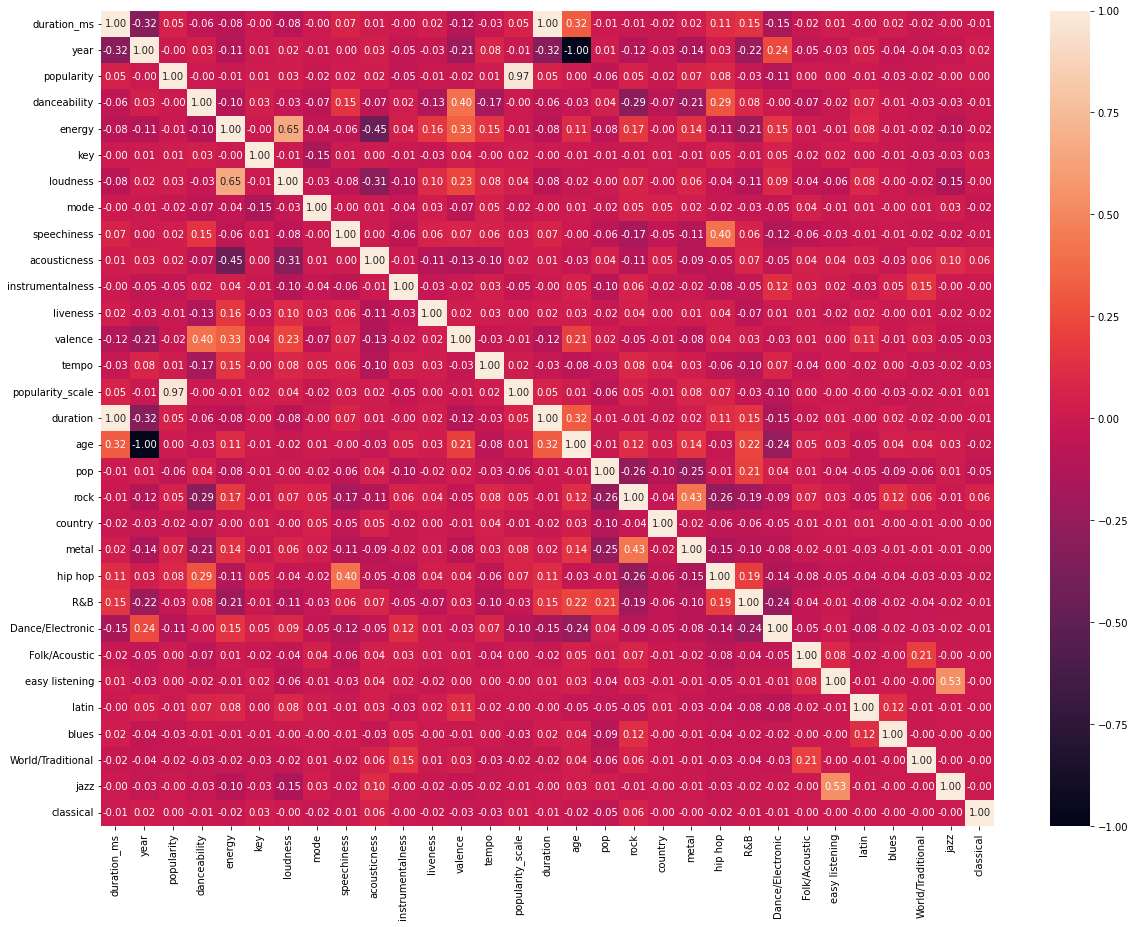

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(datanew.corr(), annot=True, fmt='.2f')

In [27]:
#feature subset selection
d = datanew.drop(columns = ['artist','acousticness', 'song','duration_ms', 'loudness', 'genre', 'year', 'genre','metal', 'easy listening', 'valence', 'speechiness', 'popularity_scale', 'popularity'])

<AxesSubplot:>

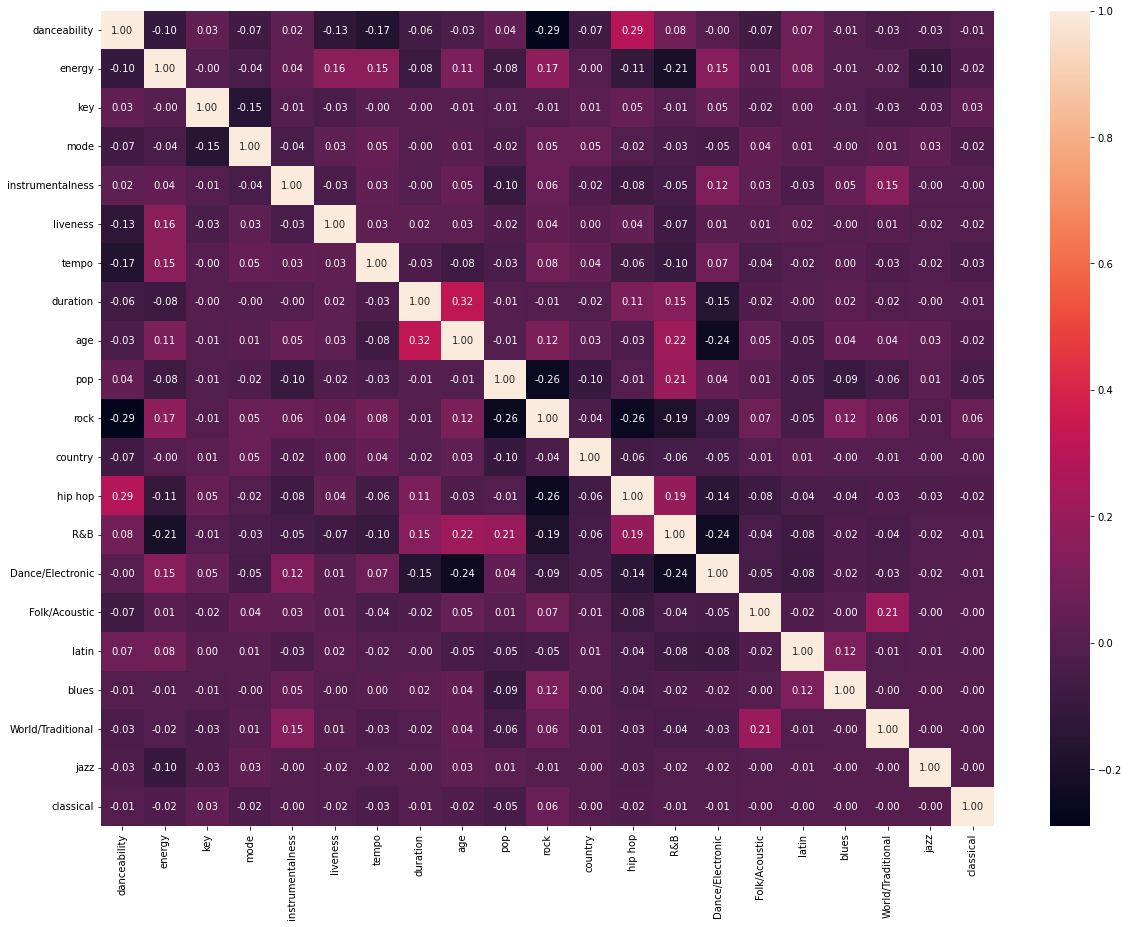

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(d.corr(), annot=True, fmt='.2f')

array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='key', ylabel='danceability'>,
        <AxesSubplot:xlabel='mode', ylabel='danceability'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='danceability'>,
        <AxesSubplot:xlabel='liveness', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='key', ylabel='energy'>,
        <AxesSubplot:xlabel='mode', ylabel='energy'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='energy'>,
        <AxesSubplot:xlabel='liveness', ylabel='energy'>,
        <AxesSubplot:xlabel='tempo', ylabel='energy'>],
       [<AxesSubplot:xlabel='danceability', ylabel='key'>,
        <AxesSubplot:xlabel='energy', ylabel='key'>,
        <AxesSubplot:xlabel='key', y

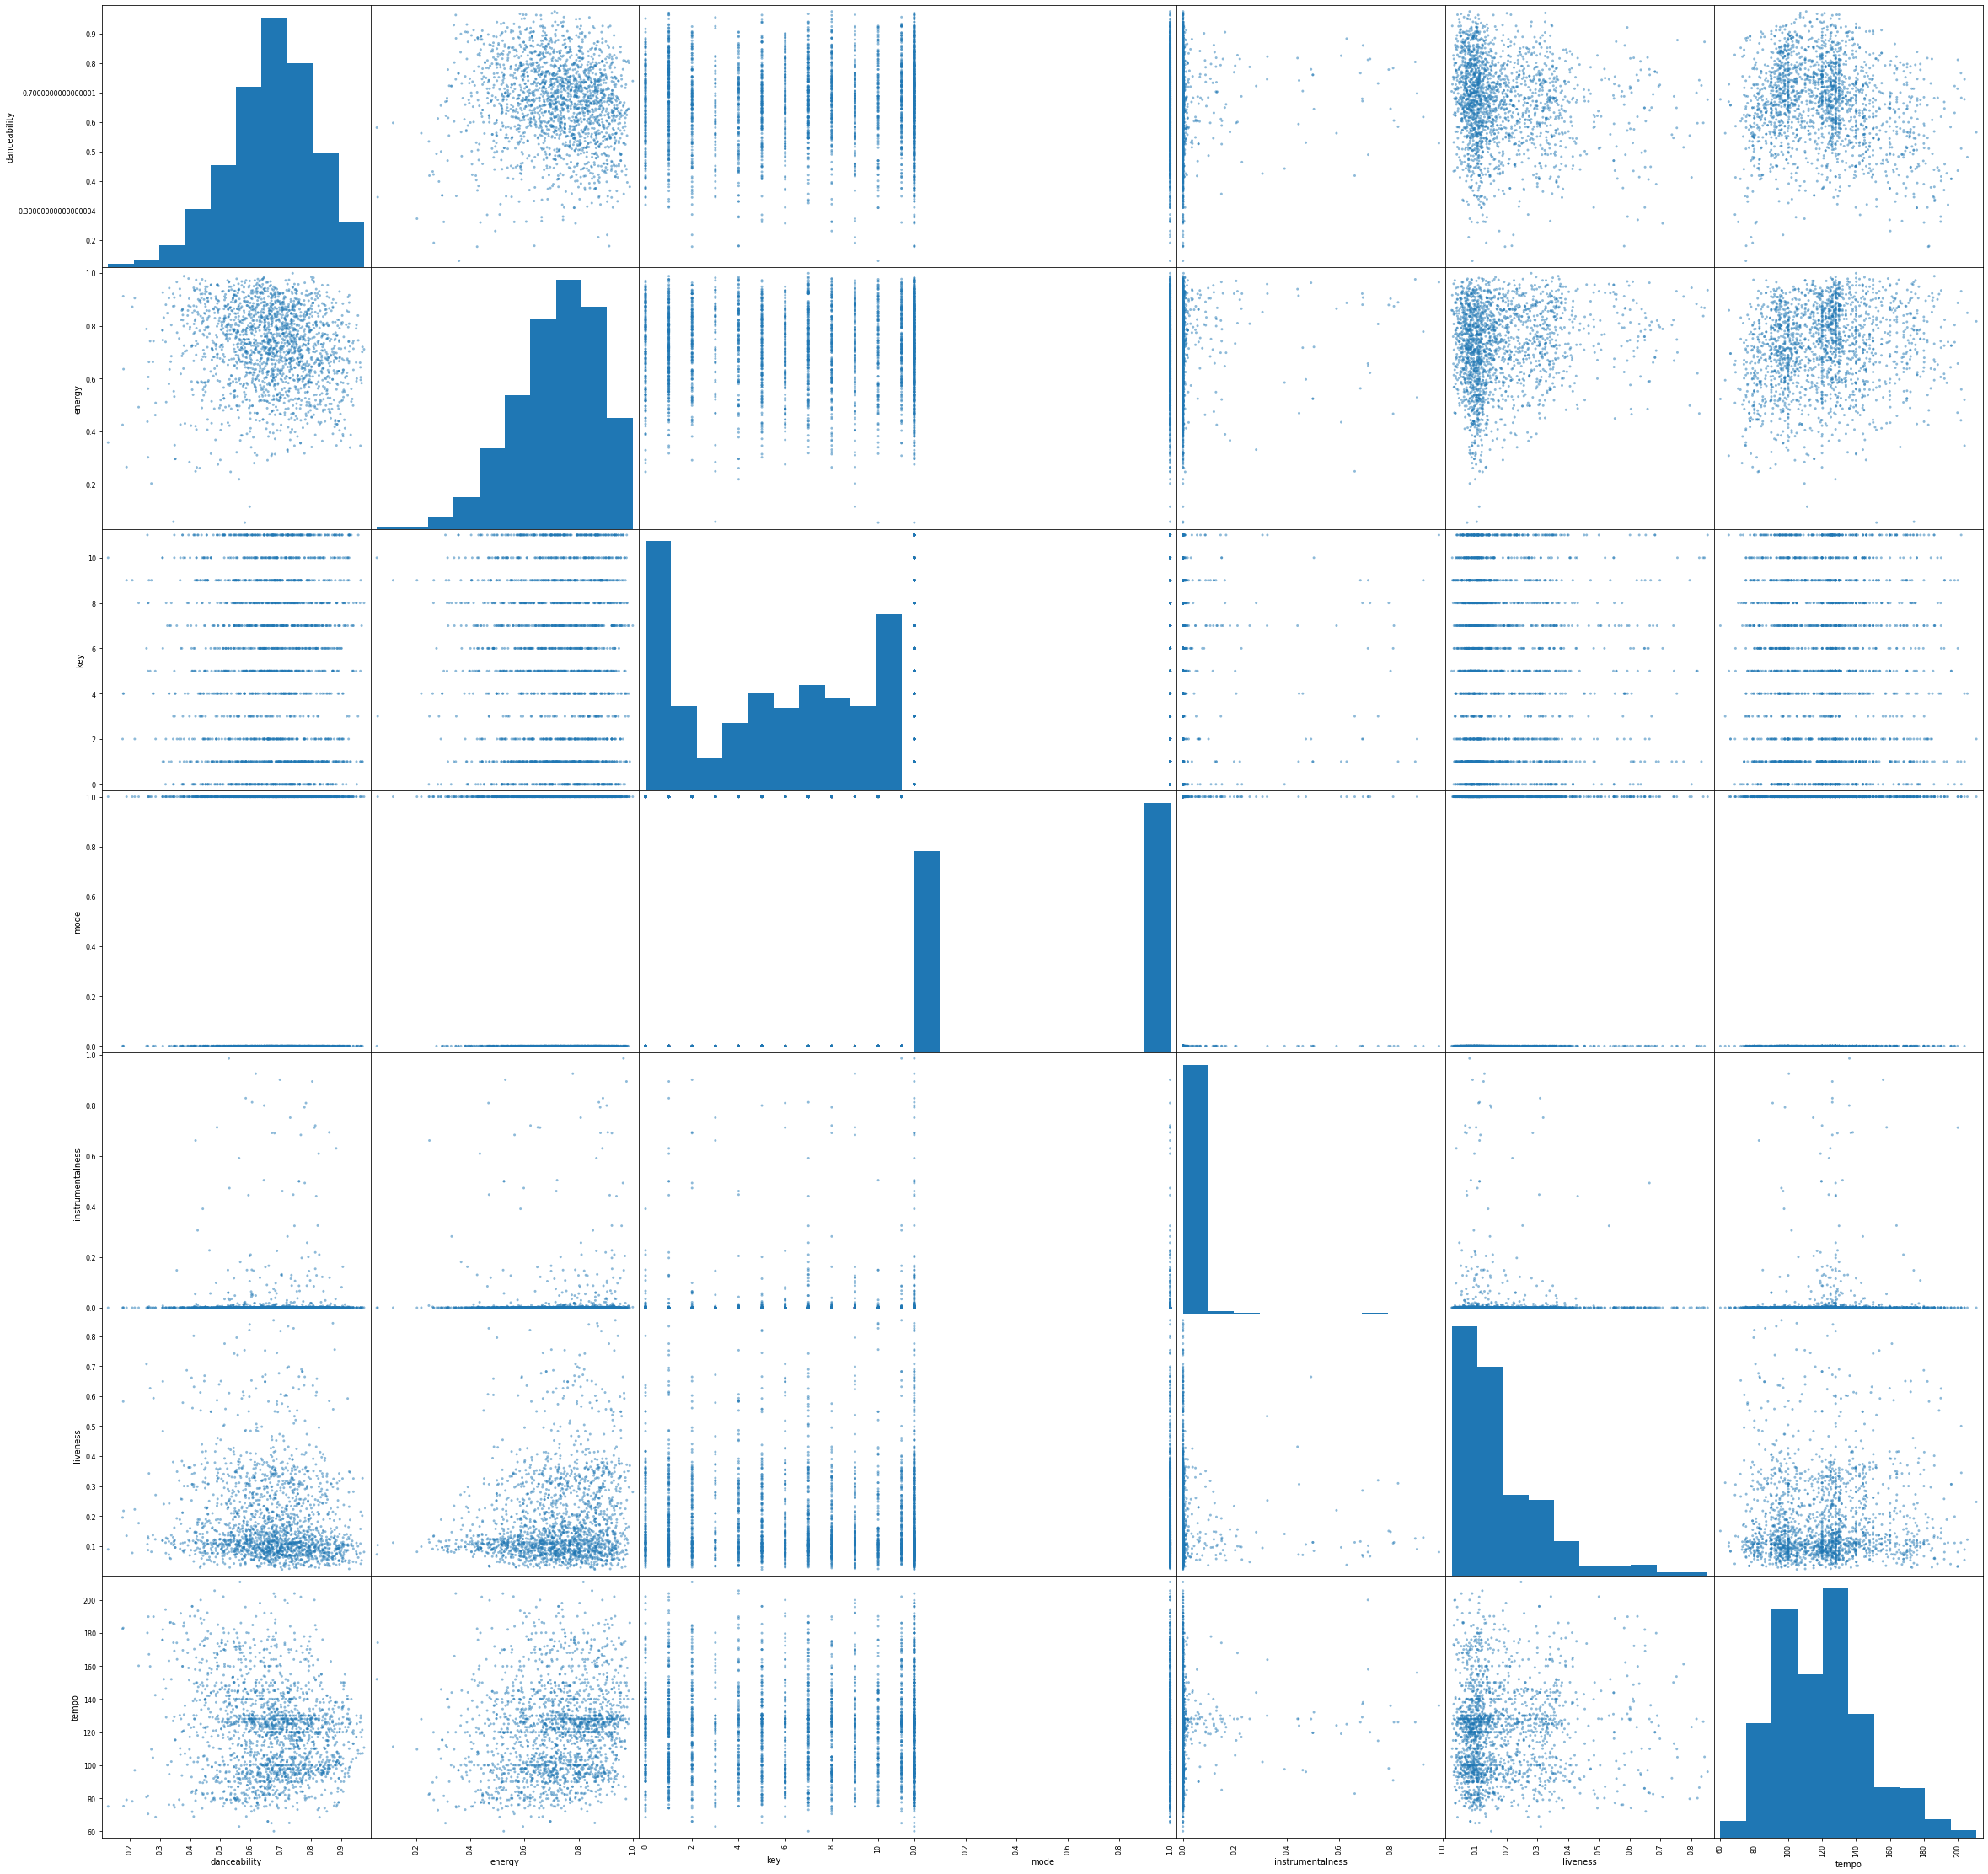

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(d[[ 'explicit', 'danceability', 'energy', 'key', 'mode', 'instrumentalness', 'liveness', 'tempo',
       'popularity_desc']], figsize=(40,40))

In [30]:
d.columns

Index(['explicit', 'danceability', 'energy', 'key', 'mode', 'instrumentalness',
       'liveness', 'tempo', 'popularity_desc', 'duration', 'age', 'age_desc',
       'pop', 'rock', 'country', 'hip hop', 'R&B', 'Dance/Electronic',
       'Folk/Acoustic', 'latin', 'blues', 'World/Traditional', 'jazz',
       'classical'],
      dtype='object')

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for train_index, test_index in split.split(d, d["popularity_desc"]):
    strat_train_set = d.loc[train_index]
    strat_test_set = d.loc[test_index]

In [32]:
x_train_set = strat_train_set.drop(columns=['popularity_desc'])
y_train = strat_train_set['popularity_desc']

x_test_set = strat_test_set.drop(columns=['popularity_desc'])
y_test = strat_test_set['popularity_desc']


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_set)
x_test = scaler.fit_transform(x_test_set)

In [34]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=30)
svm_clf.fit(x_train, y_train)


SVC(gamma='auto', random_state=30)

In [35]:
svm_pred = svm_clf.predict(x_train)

In [36]:
confusion_matrix(y_train, svm_pred)

array([[559, 241],
       [211, 589]], dtype=int64)

In [37]:
print(classification_report(y_train, svm_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       800
           1       0.71      0.74      0.72       800

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600



In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_train)

In [39]:
confusion_matrix(y_train, dt_pred)

array([[672, 128],
       [121, 679]], dtype=int64)

In [40]:
print(classification_report(y_train, dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       800
           1       0.84      0.85      0.85       800

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=20000, C=2000)
lr.fit(x_train, y_train)

LogisticRegression(C=2000, max_iter=20000)

In [42]:
lr_pred = lr.predict(x_train)

In [43]:
confusion_matrix(y_train, lr_pred)

array([[519, 281],
       [296, 504]], dtype=int64)

In [44]:
print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       800
           1       0.64      0.63      0.64       800

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600



In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
knn_pred = knn.predict(x_train)

In [47]:
confusion_matrix(y_train, knn_pred)

array([[613, 187],
       [159, 641]], dtype=int64)

In [48]:
print(classification_report(y_train, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       800
           1       0.77      0.80      0.79       800

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.78      0.78      0.78      1600

